# First Spark Streaming Example
_____

In [1]:
import findspark

findspark.init('/Users/neerajpadarthi/Neeraj/spark-2.3.0-bin-hadoop2.7')

# May cause deprecation warnings, safe to ignore, they aren't errors
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc
from pyspark.sql import Row
import re

# Can only run this once. restart your kernel for any errors.
sc = SparkContext.getOrCreate()

ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)

socket_stream = ssc.socketTextStream("127.0.0.1", 5551)

lines = socket_stream.window( 20,20 )

from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

fields = ("tweet" )
Tweet1 = namedtuple( 'Tweet', fields )

# Use Parenthesis for multiple lines or use \.
( lines.flatMap( lambda text: text.split( " " ) ) 
  .filter( lambda word: word.lower().startswith("#") ) 
  .map( lambda word: ( word.lower(), 1 ) ) 
  .reduceByKey( lambda a, b: a + b ) 
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) 
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) 
  .limit(10).registerTempTable("tweets") ) ) 


lines.map(lambda x: (x.lower(), )).foreachRDD( lambda rdd: rdd.toDF().registerTempTable("tweets1") )

def Find(string): 
    # findall() has been used  
    # with valid conditions for urls in string 
    return (re.search("(?P<url>https?://[^\s]+)", string))

lines.flatMap(lambda text: text.split(" "))\
.filter( lambda word: word.startswith("http")).map( lambda word: ( word.lower(), 1 ) )\
.reduceByKey( lambda a, b: a + b ).foreachRDD( lambda rdd: rdd.toDF()\
  .limit(10).registerTempTable("tweets_url") )




# lines.pprint()

__________
### Run the TweetRead.py file at this point
__________

In [2]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
# Only works for Jupyter Notebooks!
%matplotlib inline 

ssc.start()

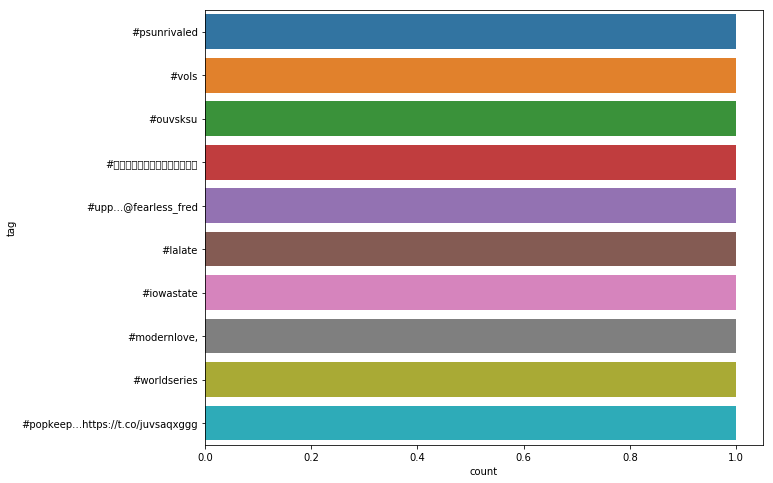

In [3]:
count = 0
while count < 2:
    
    time.sleep( 1 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
#     sqlContext.sql( 'Select * from tweets1' ).sho
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

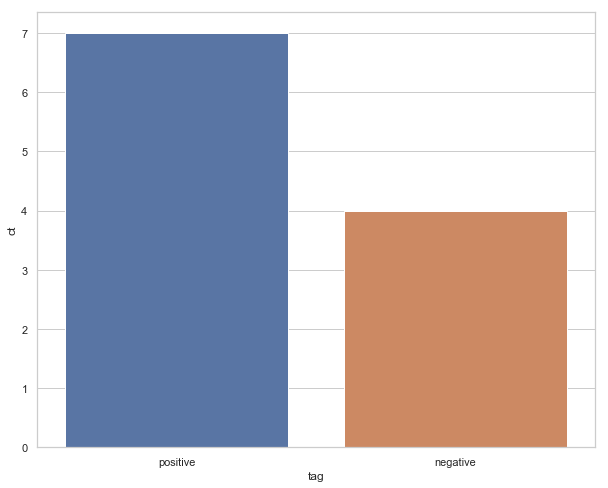

In [4]:
count = 0
while count < 10:
    
    time.sleep( 12 )
    df=sqlContext.sql( "Select 'negative' tag,count(distinct _1) ct from tweets1 WHERE (_1 LIKE '%disappoi%' or _1 LIKE '%sad%' or _1 LIKE '%concern%' or _1 LIKE '%bad%' or _1 LIKE '%fail%') \
               UNION \
               Select 'positive' tag,count(distinct _1) ct from tweets1 WHERE (_1 LIKE '%happy%' OR _1 LIKE '%wonderful%' OR _1 LIKE '%bliss%' OR _1 LIKE '%hope%' OR _1 LIKE '%win%')").toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.set(style="whitegrid")
    sns.barplot( x="tag", y="ct", data=df)
    plt.show()
    count = count + 1

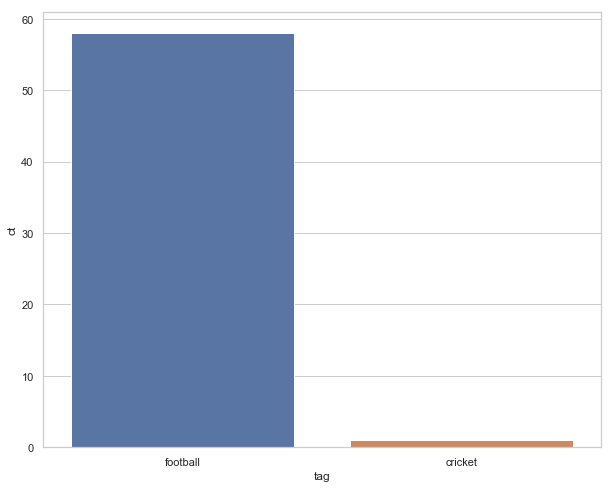

In [5]:
count = 0
while count < 10:
    
    time.sleep( 7 )
    df=sqlContext.sql( "Select 'cricket' tag,count(distinct _1) ct from tweets1 WHERE (_1 LIKE '%cricket%' or _1 LIKE '%cric%') \
               UNION \
               Select 'football' tag,count(distinct _1) ct from tweets1 WHERE (_1 LIKE '%football%')").toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.set(style="whitegrid")
    sns.barplot( x="tag", y="ct", data=df)
    plt.show()
    count = count + 1

In [6]:
count = 0
while count < 10:
    
    time.sleep( 7 )
    sqlContext.sql( 'Select _1 url,_2 ct from tweets_url').show(truncate=False)
    display.clear_output(wait=True)
    count = count + 1

+----------------------------------+---+
|url                               |ct |
+----------------------------------+---+
|https://t.co/q5vdk4ugt0rt         |2  |
|https://t.co/ddujhipggmrt         |1  |
|https://t.co/g4wdmvdansreal       |1  |
|https://t.co/zp8lakkxuy@liam_110  |1  |
|https://t.co/onubkpykjgrt         |1  |
|https://t.co/q9ykxt9p0hrt         |1  |
|https://t.co/a8qarsiwg0           |1  |
|https://t.co/4cmwsxd6n5           |1  |
|https://t.co/dkgxlkz5fbrt         |1  |
|https://t.co/gnb5d7ayuj@scottaiian|1  |
+----------------------------------+---+



In [ ]:
ssc.stop()